SALES ANALYSIS

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
path = "C:\\Users\\PC Administrator\\Desktop\\Data Science\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis.\\Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
all_months_data.to_csv("all_data.csv", index=False)


In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## 1. CLEAN UP DATA

In [6]:
all_data = all_data.dropna(how='all') # Drop all nan values
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #en la columna 'Orde..' filtrar Or
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [7]:

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [68]:
# custom project, spliting columns and concate to give it shape, 'put columns in other organization'
part_a = all_data.iloc[:,0:5]
part_b = all_data.iloc[:,5:7]
part_c = all_data.iloc[:,-1]
# all_data to dataset
dataset = pd.concat([part_a, part_c, part_b], axis=1, sort=False)
#dataset['Order Date'] = dataset['Order Date'].str[0:9] # Delete Time in Order Date, after str 9 is the time
dataset.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,23.90,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,99.99,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,600.00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,11.99,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,11.99,"333 8th St, Los Angeles, CA 90001",4


In [69]:
#el mes con mas ventas
result = dataset.groupby('Month').sum() 

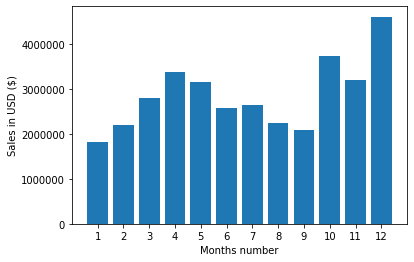

In [70]:
# lets plot by months
months = range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months number')
plt.show()


In [71]:
def get_city(addres):
    return addres.split(',')[1] 
def get_state(addres):
    return addres.split(',')[2].split(' ')[1]
dataset['City'] = dataset['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})' )
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,23.90,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,99.99,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,600.00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,11.99,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,11.99,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## 2. Analysis Data

### we can apply Gruoupby function to answers some questions like, wich its the city than more buy...
### Its important make visualizations

In [72]:
by_city = dataset.groupby('City').sum()
by_city

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


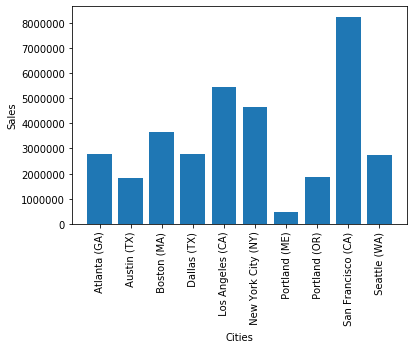

In [73]:
cities = [element for element, df in dataset.groupby('City')]
plt.bar(cities, by_city['Sales'])
plt.xticks(cities, rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()

### What time should we display ad to maximize likelihood of customer's buying product?

In [76]:

dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Hour'] = dataset['Order Date'].dt.hour
dataset['Minute'] = dataset['Order Date'].dt.minute
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,23.90,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,99.99,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,600.00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,11.99,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,11.99,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


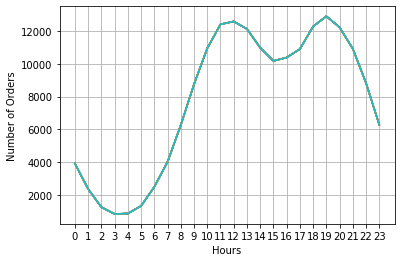

In [82]:
hours = [elem for elem, oj in dataset.groupby('Hour') ]
plt.plot(hours, dataset.groupby(dataset['Hour']).count()) 
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### What Product are most often sold together?

In [86]:
df = dataset[dataset['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\PC Administrator\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [90]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #cuales son 2 items que mas se repiten
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Wich product has more sells

Text(0, 0.5, 'Quatity')

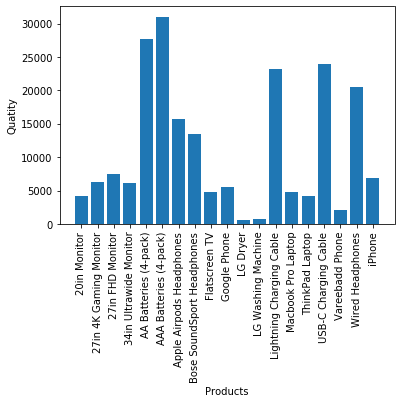

In [101]:
product_g = dataset.groupby('Product')
quantity_order = product_g.sum()['Quantity Ordered']
products = [ele for ele, df in product_g]
plt.bar(products, quantity_order)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quatity')


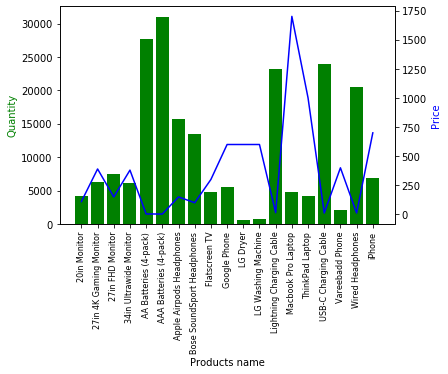

In [107]:
prices = dataset.groupby(['Product']).mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_order, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products name')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

